# Read data & perform basic analysis

In [63]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [64]:
df = pd.read_csv(r"C:\Users\USER\Desktop\Projects\Data Science Projects\2023 data analysis\Bitcoin Analysis\Bitcoin/bitcoin_price_Training.csv")

In [65]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [66]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [67]:
df.shape

(1556, 7)

In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


# data pre-processing

Check whether data-types are correct or not 
    check whether Data have missing value or not 
    check whether data have duplicate entries or not !

In [70]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

we notice that the date is in object format so we convert to datetime


Date is to be in Date-time format inorder to perform a time series analysis but In the current dataset 
the date is stated as an object which is to be converted in the date time format..



pandas Data Type for Time-Series : 
    a ) datetime64[ns]
datetime64[ns] is a 64 bit number ie it uses/occupies 64 bits or 8-Bytes in computer memory to store datetime value ..

    b ) datetime64[ns, tz]

    c ) datetime64[ns, UTC]
    

    d ) dtype('<M8[ns]') or dtype('>M8[ns]')
 
represents byte order, small end （ the least significant byte is stored in the smallest address ）
M is a type character code for Datetime
8 represents element byte length, data size ie 8-byte or 64 bit 




    where UTC = Coordinated Universal Time
          ns  = nano second
          tz  = time zone

datetime64[ns] is a general dtype, while dtype('<M8[ns]') is a specific dtype ,

Both are similar , it entirely depends upon how your numpy was compiled & on the bit architecture of the OS ..

Now architecture of numpy itself depends upon lots of factors like 
what environment u are using , what about the generation of your laptop too..


But if u want to think it bluntly , they are same..
By the way ,u can cross_check using below code:

import numpy as np
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

In [71]:
# so you can use any of this format
df['Date'] = pd.to_datetime(df['Date'])

In [72]:
# or you can use the below format
# or use the S type function

df['Date'] = df['Date'].astype('datetime64[ns]')

In [73]:
df['Date']

0      2017-07-31
1      2017-07-30
2      2017-07-29
3      2017-07-28
4      2017-07-27
          ...    
1551   2013-05-02
1552   2013-05-01
1553   2013-04-30
1554   2013-04-29
1555   2013-04-28
Name: Date, Length: 1556, dtype: datetime64[ns]

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1556 non-null   datetime64[ns]
 1   Open        1556 non-null   float64       
 2   High        1556 non-null   float64       
 3   Low         1556 non-null   float64       
 4   Close       1556 non-null   float64       
 5   Volume      1556 non-null   object        
 6   Market Cap  1556 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 85.2+ KB


In [75]:
df['Date'].min()

Timestamp('2013-04-28 00:00:00')

In [76]:
df['Date'].max()

Timestamp('2017-07-31 00:00:00')

ie data is collected from "28th April 2013" to "31st July 2017"

In [77]:
type(df['Date'].max())

pandas._libs.tslibs.timestamps.Timestamp

In [78]:
# now our time is in timestamp format
# next we check for missing value

In [79]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [80]:
# we have no missing value
# next we check for duplicate rows

In [81]:
df.duplicated().sum()

0

In [82]:
# we have no duplicate rows

In [83]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [84]:
df.tail(3)

,Date,Open,High,Low,Close,Volume,Market Cap
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"


In [85]:
# sort the data from the top 

# df.sort_index(ascending=False)
# data = df.sort_index(ascending=False).reset_index()

# what is the change of price of the stock over time?

In [86]:
data = df.sort_index(ascending=False).reset_index()

In [87]:
data.drop('index', axis=1, inplace=True)

In [88]:
data

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
1551,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
1552,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
1553,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1554,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [89]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

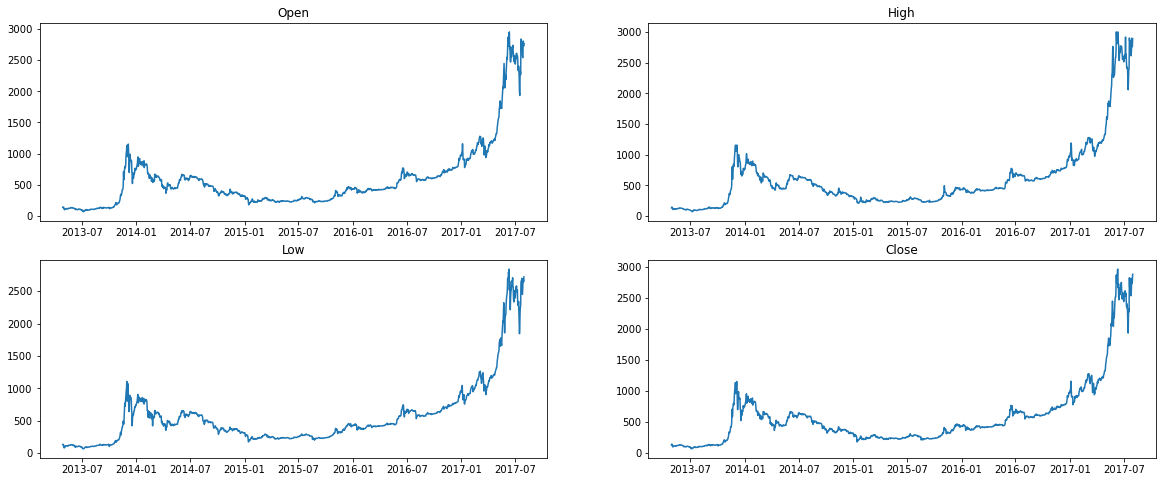

In [90]:
plt.figure(figsize=(20, 8)) #to zoom in

for index, col in enumerate(['Open', 'High', 'Low', 'Close'], 1):
    plt.subplot(2,2, index)
    plt.plot(df['Date'], df[col])
    plt.title(col)

conclusion: for the low chat we seen a spike of the price of bitcoin 

# Analysing open , high , low , close value of Bitcoin 

try out candle-stick/ohlc charts ! , both are same .

In [91]:
 data.shape

(1556, 7)

In [92]:
bitcoin_sample = data[0:50]

In [93]:
import chart_studio as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [94]:
init_notebook_mode(connected=True)

In [95]:
trace = go.Candlestick(x=bitcoin_sample['Date'],
              high= bitcoin_sample['High'],
              open= bitcoin_sample['Open'],
              close = bitcoin_sample['Close'],
              low = bitcoin_sample['Low'])

In [96]:
candle_data = [trace]

layout = {
    'title' : 'Bitcoin Historical Price',
    'xaxis' : {'title': 'Date' },
    'yaxis' : {'title' : 'Price'}
}

In [97]:
fig = go.Figure(data = candle_data, layout=layout)

fig.update_layout(xaxis_rangeslider_visible = False)

fig.show()

# Analysing closing price (on normal scale & log-scale)¶

<AxesSubplot:>

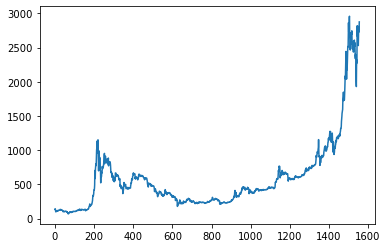

In [98]:
data['Close'].plot()

we have to set date as index

In [99]:
data.set_index('Date', inplace=True)

In [100]:
data

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


<AxesSubplot:xlabel='Date'>

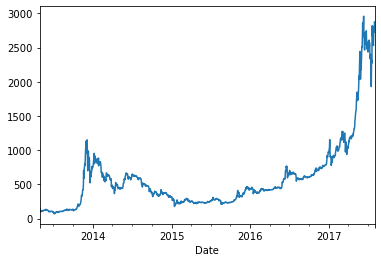

In [101]:
data['Close'].plot()

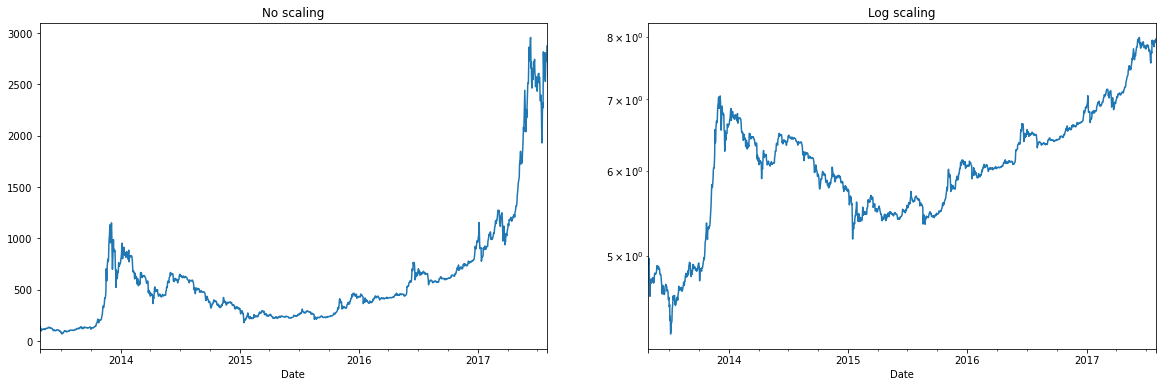

In [102]:
plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
data['Close'].plot()
plt.title('No scaling')

plt.subplot(1,2,2)
np.log(data['Close']).plot()
plt.title('Log scaling')
plt.yscale('log')

Some features of the plot above:

    There is an up-ward trend from 2016 for each graph
    There is no seasonality
    There are no outliers

# Analyse closing Price on Yearly , Quarterly , monthly basis

Before doing resampling , first u have to make your date feature 'row-index' so that u can resample it in a 
    a..yearly('Y')  , 
    b..quarterly('Q')   ,
    c..monthly('M') ,
    d..weekly basis ('W'), 
    e..Daily_basis('D')  
    f..minutes ('3T') , 
    g..30 second bins('30S')   ,
    h..resample('17min')

In [103]:
data.head(4)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"


In [104]:
## finding avg price of bitcoin on yearly basis ..

data['Close'].resample('Y').mean()

Date
2013-12-31     257.474476
2014-12-31     527.236658
2015-12-31     272.453260
2016-12-31     568.492131
2017-12-31    1628.622123
Freq: A-DEC, Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

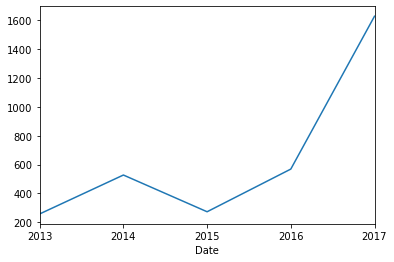

In [105]:
## to plot it 

data['Close'].resample('Y').mean().plot()

In [106]:
## fto get the quarterly analysis basis .. change 'Y' to 'Q'

data['Close'].resample('Q').mean()

Date
2013-06-30     115.162188
2013-09-30     111.291196
2013-12-31     502.657609
2014-03-31     700.586000
2014-06-30     520.929341
2014-09-30     534.055435
2014-12-31     357.075761
2015-03-31     251.209333
2015-06-30     236.858022
2015-09-30     254.859891
2015-12-31     346.037065
2016-03-31     410.728571
2016-06-30     512.492747
2016-09-30     615.702283
2016-12-31     732.721413
2017-03-31    1034.707444
2017-06-30    1912.552198
2017-09-30    2519.418387
Freq: Q-DEC, Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

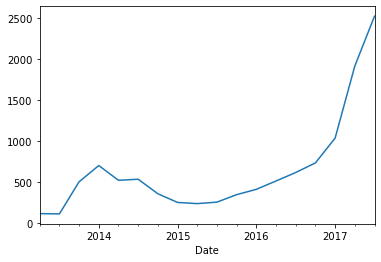

In [107]:
# to plot the graph
data['Close'].resample('Q').mean().plot()

In [108]:
## to get the monthly analysis basis .. change 'Q' to 'M'

data['Close'].resample('M').mean()

Date
2013-04-30     139.250000
2013-05-31     119.993226
2013-06-30     107.761333
2013-07-31      90.512258
2013-08-31     113.905161
2013-09-30     130.061667
2013-10-31     158.311935
2013-11-30     550.420667
2013-12-31     800.780968
2014-01-31     844.168387
2014-02-28     661.618214
2014-03-31     592.200323
2014-04-30     461.362000
2014-05-31     486.651290
2014-06-30     615.917333
2014-07-31     618.025484
2014-08-31     536.087742
2014-09-30     445.186333
2014-10-31     364.150000
2014-11-30     366.100000
2014-12-31     341.268387
2015-01-31     248.782581
2015-02-28     234.153571
2015-03-31     269.041290
2015-04-30     235.491667
2015-05-31     236.996774
2015-06-30     238.081000
2015-07-31     279.563871
2015-08-31     250.734516
2015-09-30     233.595333
2015-10-31     264.855161
2015-11-30     348.883333
2015-12-31     424.464516
2016-01-31     410.844516
2016-02-29     404.408276
2016-03-31     416.525161
2016-04-30     434.339333
2016-05-31     461.953871
2016-06

<AxesSubplot:xlabel='Date'>

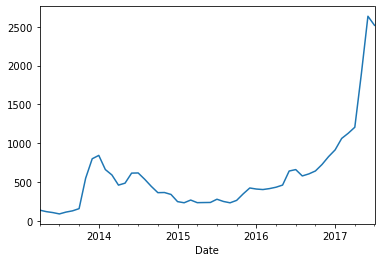

In [109]:
## fto get the monthly analysis basis .. change 'Q' to 'M'

data['Close'].resample('M').mean().plot()

In [110]:
## fto get the Weekly analysis basis .. change 'M' to 'W'
data['Close'].resample('W').mean()

Date
2013-04-28     134.210000
2013-05-05     118.842857
2013-05-12     113.925714
2013-05-19     118.710000
2013-05-26     127.732857
                 ...     
2017-07-09    2569.241429
2017-07-16    2232.730000
2017-07-23    2549.514286
2017-07-30    2689.315714
2017-08-06    2875.340000
Freq: W-SUN, Name: Close, Length: 224, dtype: float64

<AxesSubplot:xlabel='Date'>

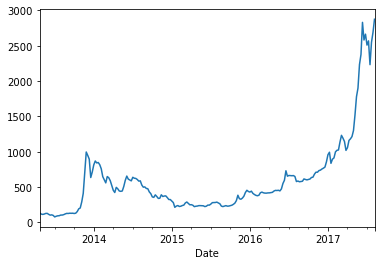

In [111]:
## fto get the Weekly analysis basis .. change 'M' to 'W'

data['Close'].resample('W').mean().plot()

# Analysing Daily change in Closing price of stocks

Daily Stock Return Formula

To calculate how much you gained or lost per day for a stock, subtract the opening price from the closing price. Then, multiply the result by the number of shares you own in the company. 

In [112]:
data['Close']

Date
2013-04-28     134.21
2013-04-29     144.54
2013-04-30     139.00
2013-05-01     116.99
2013-05-02     105.21
               ...   
2017-07-27    2671.78
2017-07-28    2809.01
2017-07-29    2726.45
2017-07-30    2757.18
2017-07-31    2875.34
Name: Close, Length: 1556, dtype: float64

In [113]:
data['Close_price_pct_change'] = data['Close'].pct_change()*100

In [114]:
data['Close_price_pct_change']

Date
2013-04-28          NaN
2013-04-29     7.696893
2013-04-30    -3.832849
2013-05-01   -15.834532
2013-05-02   -10.069237
                ...    
2017-07-27     5.626915
2017-07-28     5.136276
2017-07-29    -2.939114
2017-07-30     1.127107
2017-07-31     4.285538
Name: Close_price_pct_change, Length: 1556, dtype: float64

<AxesSubplot:xlabel='Date'>

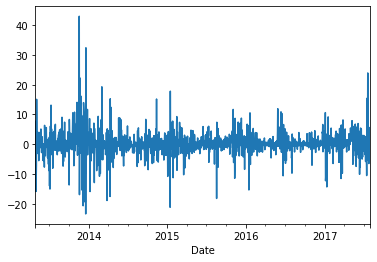

In [115]:
data['Close_price_pct_change'].plot()

If u want to make this Pandas plot interactive , u can think of using cufflinks & Plotly 

establishing the entire set-up of Plotly..

In [116]:
import chart_studio.plotly as py
## chart_studio provides a web-service for hosting graphs!

import plotly.graph_objs as go

import plotly.express as px

from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot
init_notebook_mode(connected=True)

## plot is a command of Matplotlib which is more old-school. It creates static charts
## iplot() when working in a Jupyter Notebook to display the plot in the notebook.
## iplot is an interactive plot. Plotly takes Python code and makes beautiful looking JavaScript plots.

In [117]:
!pip install cufflinks

Defaulting to user installation because normal site-packages is not writeable


In [118]:
import cufflinks as cf

In [119]:
cf.go_offline()

In [120]:
data['Close_price_pct_change']

Date
2013-04-28          NaN
2013-04-29     7.696893
2013-04-30    -3.832849
2013-05-01   -15.834532
2013-05-02   -10.069237
                ...    
2017-07-27     5.626915
2017-07-28     5.136276
2017-07-29    -2.939114
2017-07-30     1.127107
2017-07-31     4.285538
Name: Close_price_pct_change, Length: 1556, dtype: float64

In [121]:
type(data['Close_price_pct_change'])

pandas.core.series.Series

In [122]:
data['Close_price_pct_change'].iplot()